In [1]:
import numpy as np

dset = np.load('training_data.npz')

In [2]:
dset

NpzFile 'training_data.npz' with keys: X_train, y_train, X_test, y_test

In [5]:
train_img = dset['X_train']
train_label = dset['y_train']
test_img = dset['X_test']
test_label = dset['y_test']

print(train_img.shape,test_img.shape)

(160, 256, 256) (40, 256, 256)


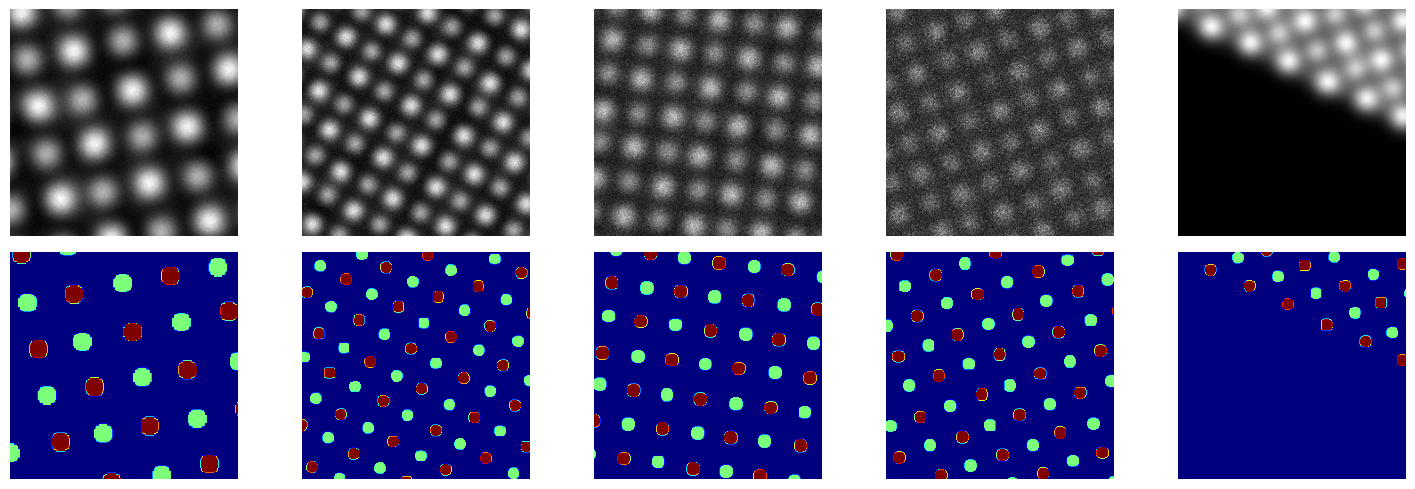

In [15]:
import matplotlib.pyplot as plt
n=5

fig, axs = plt.subplots(2, n, figsize=(15, 5), sharex=True, sharey=True)

for i in range(n):
    axs[0, i].imshow(train_img[i], cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(train_label[i], cmap='jet')
    axs[1, i].axis('off')
fig.tight_layout()

In [16]:
import os
import sys

path = r'C:\Test_pycroscopy\DataGenSTEM\DataGenSTEM'
sys.path.append(path)

import data_generator as dg

In [23]:
import atomai as aoi
model = aoi.models.Segmentor(nb_classes=3)

c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\atomai\trainers\trainer.py:660: UserWarning: No GPU found. The training can be EXTREMELY slow
  warnings.warn(


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\atomai\utils\preproc.py:54: UserWarning: Adding a channel dimension of 1 to training images
  warnings.warn(
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\atomai\utils\preproc.py:59: UserWarning: Adding a channel dimension of 1 to test images
  warnings.warn(


Epoch 1/10 ... Training loss: 0.62 ... Test loss: 0.767 ... Train Accuracy: 0.7753 ... Test Accuracy: 0.2947 ... GPU memory usage: N/A / N/A
Epoch 10/10 ... Training loss: 0.5572 ... Test loss: 0.6319 ... Train Accuracy: 0.8018 ... Test Accuracy: 0.2947 ... GPU memory usage: N/A / N/A
Model (final state) evaluation loss: 0.6284
Model (final state) accuracy: 0.2958
Plotting training history


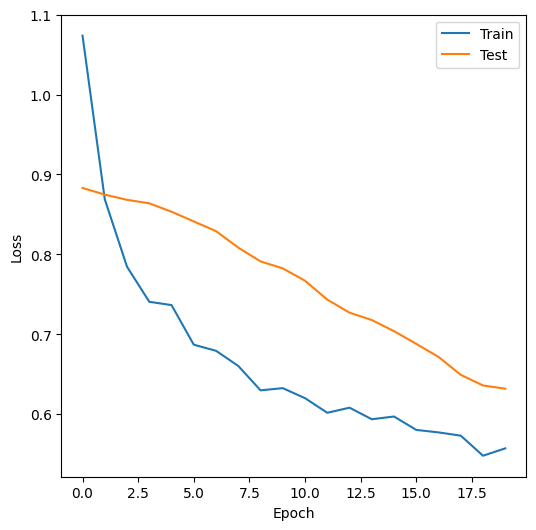

In [25]:
model.fit(train_img, train_label, test_img, test_label,
          training_cycles=10, compute_accuracy=True, swa=False, batch_size=16
)

In [28]:
image_array = np.array(test_img)[0]
expdata = dg.shotgun_crop(image_array, crop_size=64, n_crops=1)

Batch 1/1
1 image was decoded in approximately 0.0891 seconds


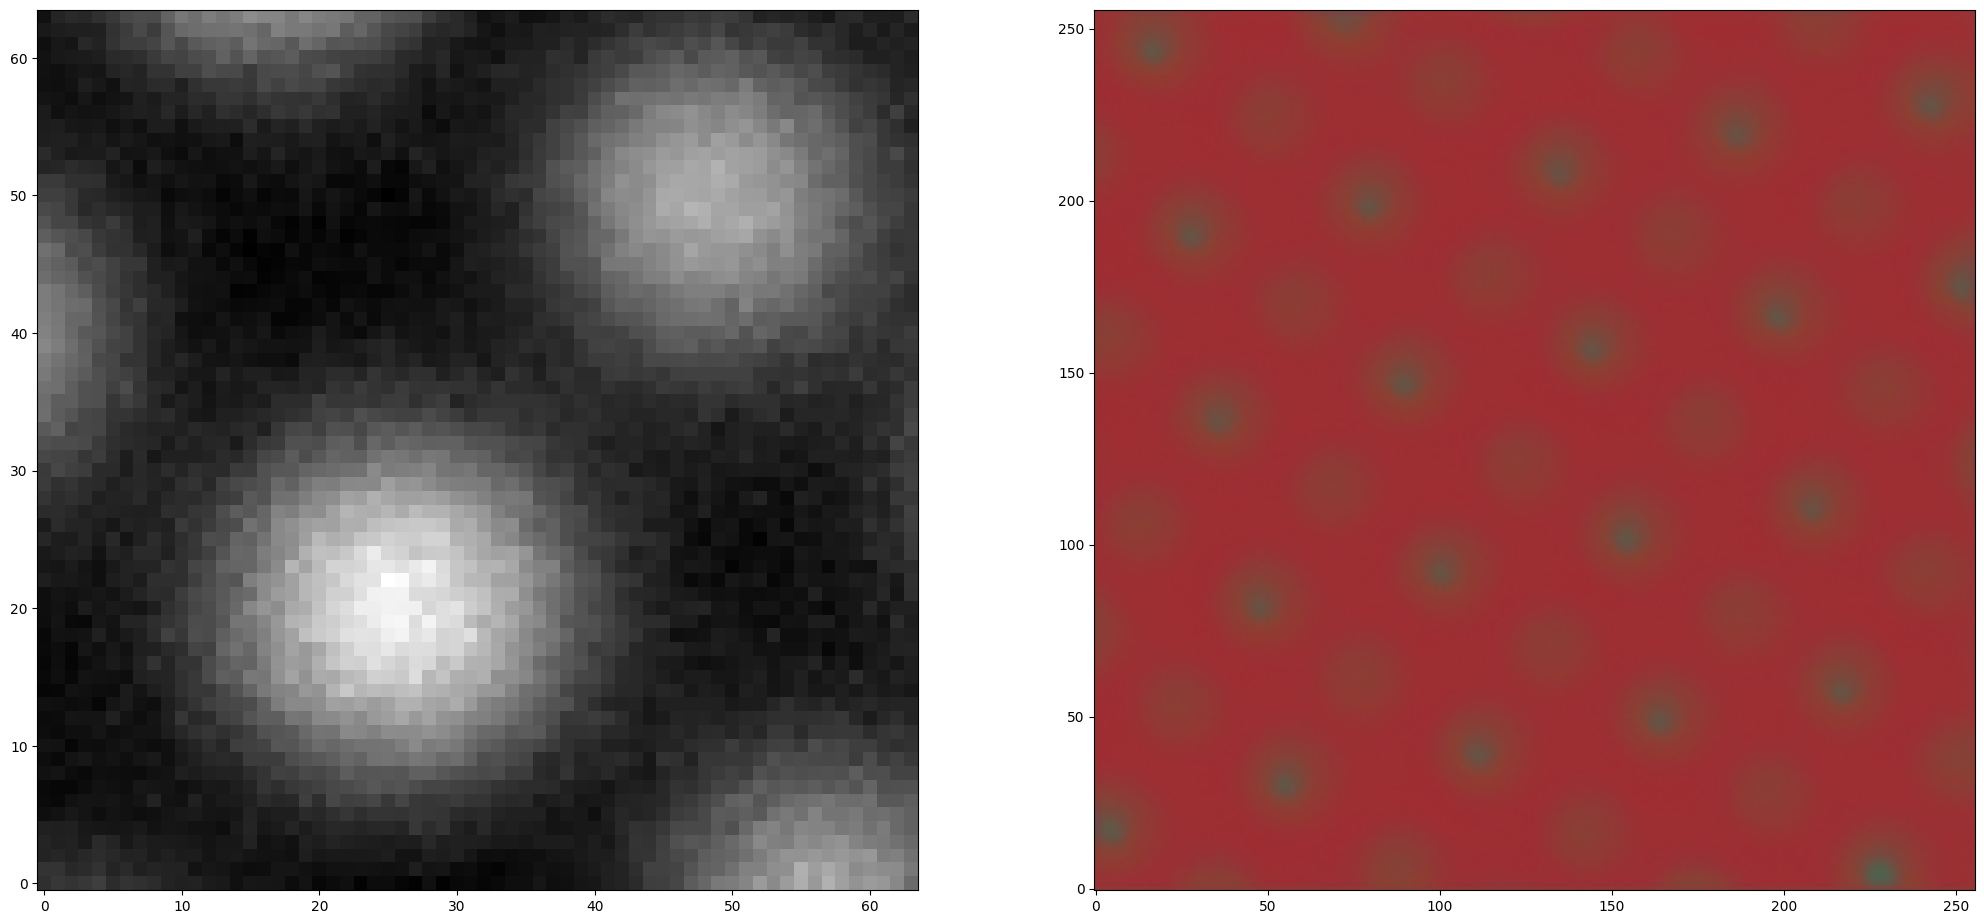

In [ ]:
# 3개의 class중 예측
output, arr = model.predict(image_array)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))
ax1.imshow(expdata[0], cmap='gray', origin="lower")
ax2.imshow(output.squeeze(), origin="lower")

$$
I(\theta) = I_0 \left( \frac{2J_1(k a \sin\theta)}{k a \sin\theta} \right)^2
$$

In [64]:
# 위의 식을 활용

seperation = [1,3.8317,5,10.1735]
text= ['a','b,','c','d']

x1 = np.linspace(-15, 15, 400)
[x,y] = np.meshgrid(x1,x1)


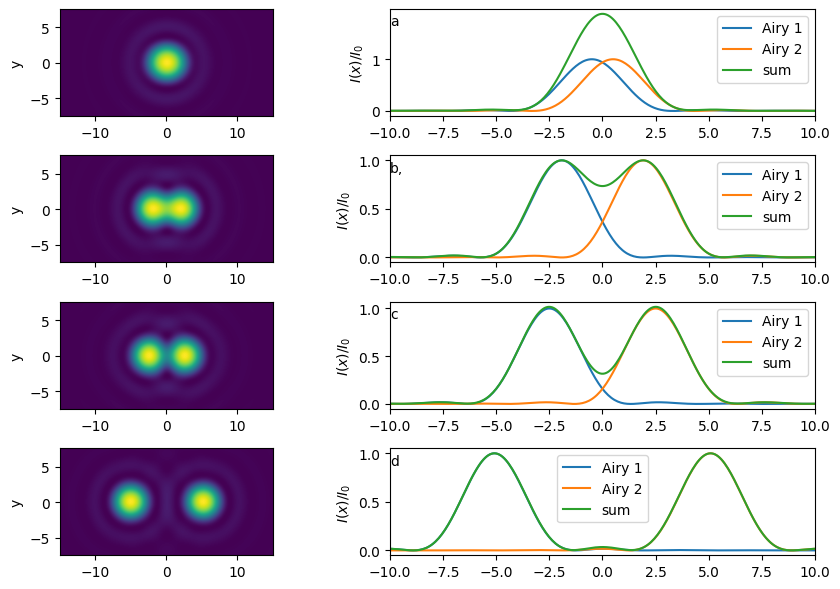

In [65]:
import scipy

fig,ax = plt.subplots(4,2, figsize=(9,6))
gamma = 0.3

for i in range(4):
    shift = seperation[i]
    r1 = np.sqrt((x+shift/2)**2 + y**2)
    r2 = np.sqrt((x-shift/2)**2 + y**2)
    I1  = 4 * (scipy.special.j1(r1) / r1)**2
    I2 = 4 * (scipy.special.j1(r2) / r2)**2
    ax[i,0].imshow(np.log2(gamma+I2+I1)[100:300,:], extent =[x1[0],x1[-1],x1[100],x1[300]])
    ax[i,0].set_ylabel('y')

    norm_I1 = 4 * (scipy.special.j1((x1+shift/2)) / (x1+shift/2))**2
    norm_I2 = 4 * (scipy.special.j1((x1-shift/2)) / (x1-shift/2))**2
    ax[i,1].plot(x1, norm_I1, label='Airy 1')
    ax[i,1].plot(x1, norm_I2, label='Airy 2')
    ax[i,1].plot(x1, norm_I1+norm_I2, label='sum')
    ax[i,1].set_xlim(-10,10)
    _,ymax = ax[i,1].get_ylim()
    ax[i,1].text(-10,ymax*.95,text[i], color = 'black', verticalalignment = 'top')
    
    ax[i,1].set_ylabel('$I(x)/I_0$')
    ax[i,1].legend()
plt.tight_layout()



In [1]:
import pyTEMlib.kinematic_scattering

acceleration_voltage = 100*1e3
d = 1  # 1/nm

lambda_e = pyTEMlib.kinematic_scattering .get_wavelength(acceleration_voltage)
theta_R = lambda_e/d

print(f'angular resolution {theta_R*1000:.1f} mrad')

Symmetry functions of spglib enabled
Qt dialogs are not available
Using kinematic_scattering library version {_version_ }  by G.Duscher
angular resolution 37.0 mrad


In [2]:
import pyTEMlib
import pyTEMlib.kinematic_scattering as ks

atoms = ks.structure_by_name('Silicon')
print(atoms.get_scaled_positions())

Symmetry functions of spglib enabled
Qt dialogs are not available
Using kinematic_scattering library version {_version_ }  by G.Duscher
[[0.   0.   0.  ]
 [0.25 0.25 0.25]
 [0.5  0.5  0.  ]
 [0.75 0.75 0.25]
 [0.5  0.   0.5 ]
 [0.75 0.25 0.75]
 [0.   0.5  0.5 ]
 [0.25 0.75 0.75]]


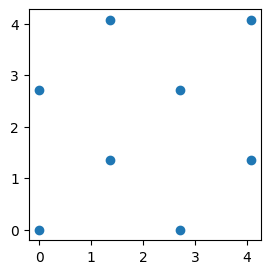

In [3]:
import matplotlib.pyplot as plt
x = atoms.positions[:,0]
y = atoms.positions[:,1]

fig = plt.figure(figsize=(3, 3))
plt.scatter(x,y)
plt.show()

In [4]:
acceleration_voltage = 200.0 *1000.0 

wave_length  = ks.get_wavelength(acceleration_voltage) # 단위 : 옹스트롬

print(f"V :{acceleration_voltage/1000} kV , Wavelengh : {wave_length*100} pm")

V :200.0 kV , Wavelengh : 2.507934045054801 pm


In [29]:
help(ks.get_wavelength)

Help on function get_wavelength in module pyTEMlib.kinematic_scattering:

get_wavelength(acceleration_voltage)
    Calculates the relativistic corrected de Broglie wavelength of an electron in Angstrom
    
    Parameter:
    ---------
    acceleration_voltage: float
        acceleration voltage in volt
    Returns:
    -------
    wavelength: float
        wave length in Angstrom (= meter *10**10)



In [35]:
import numpy as np
# zone-axis
zone = [0,0,1]
reciprocal_lattice = atoms.cell.reciprocal()

# 역격자 공간에서 zone axis
zone_vector = np.dot(zone,reciprocal_lattice)
unit_vec = zone_vector / np.linalg.norm(zone_vector)
k0_vec = unit_vec * (1/wave_length)
k0_vec

array([ 0.        ,  0.        , 39.87345688])

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

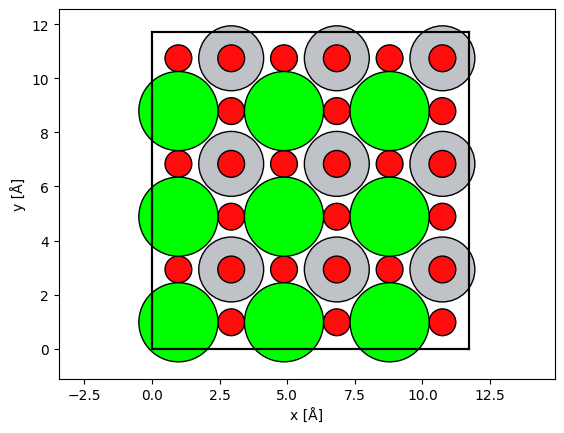

In [5]:
import ase
import ase.spacegroup
import abtem

# Sr : 0,0,0 / Ti : 0.5,0.5,0.5 / O : 0.5,0.5,0
atom_pos = [(0.0, 0.0, 0.0), (0.5, 0.5, 0.5), (0.5, 0.5, 0.0)]
srtio3 = ase.spacegroup.crystal(['Sr','Ti','O'],atom_pos,spacegroup=221,cellpar = 3.905,size=(3,3,15))
srtio3.center()
abtem.show_atoms(srtio3)

In [6]:
potential = abtem.Potential(srtio3, 
                      gpts=512, 
                      slice_thickness=3.904/2, 
                      parametrization='kirkland', 
                      projection='infinite')
potential.sampling

(0.022880859375, 0.022880859375)

[########################################] | 100% Completed | 3.48 ss


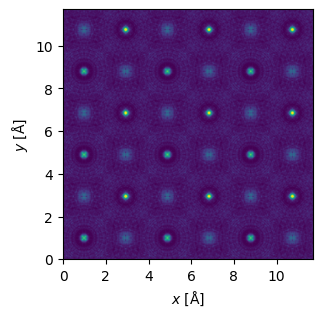

In [8]:
# help(abtem.Potential)
wave = abtem.PlaneWave(energy=200e3, sampling=0.022)
exit_wave = wave.multislice(potential)
exit_wave.show(figsize=(3,3))

[                                        ] | 0% Completed | 1.18 ms

[########################################] | 100% Completed | 1.47 ss


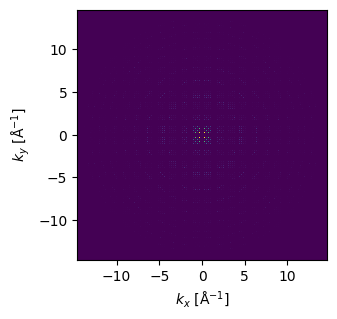

In [9]:
exit_wave.diffraction_patterns().block_direct().show(power=0.4,figsize=(3,3))

(<Figure size 1000x500 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

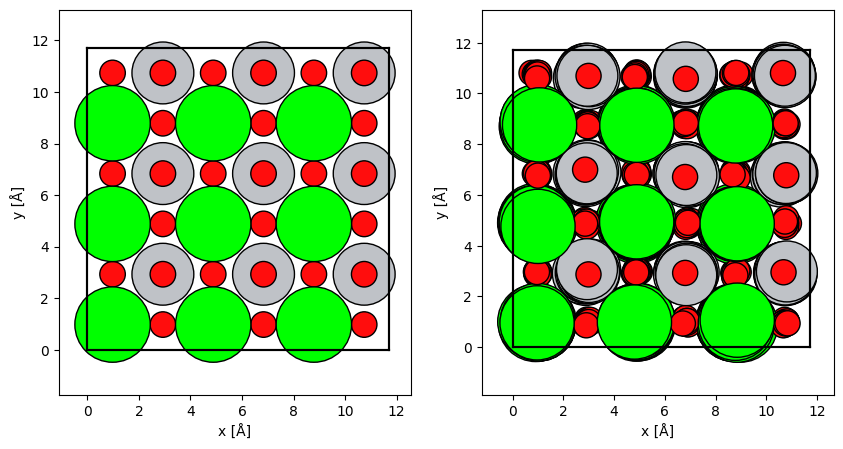

In [10]:
# 0.1옹스트롬 범위내에서 격자진동 , 10개의 cell / iter로 가져오기에 하나만 반영됨 -> 평균을 구하기
frozen_phonons = abtem.FrozenPhonons(srtio3, 10, {'Sr': 0.1, 'Ti': 0.1, 'O': 0.1}, seed=100)
atoms_conf = next(iter(frozen_phonons))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

abtem.show_atoms(srtio3, ax=ax1)

abtem.show_atoms(atoms_conf, ax=ax2)

[########################################] | 100% Completed | 1.27 ss
[########################################] | 100% Completed | 1.00 ss
[########################################] | 100% Completed | 2.62 ss


Text(0.5, 1.0, 'Mean TDS diffraction')

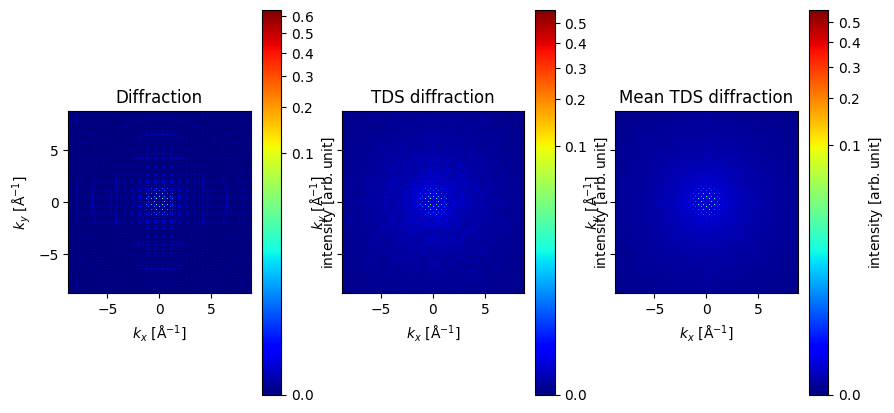

In [13]:
tds_potential = abtem.Potential(frozen_phonons,gpts=432,slice_thickness = 3.904/2)
tds_exit_waves = wave.multislice(tds_potential)
tds_diffraction_pattern = tds_exit_waves.diffraction_patterns('valid')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), sharex=True, sharey=True)


diffraction_pattern = exit_wave.diffraction_patterns()
diffraction_pattern.show(power=.25, cmap='jet', ax=ax1, cbar=True)
ax1.set_title('Diffraction')
tds_diffraction_pattern[0].show(power=.25, cmap='jet', ax=ax2, cbar=True)
ax2.set_title('TDS diffraction')

tds_diffraction_pattern.mean(0).show(ax=ax3, cmap='jet', power=.25, cbar=True)
ax3.set_title('Mean TDS diffraction')

[########################################] | 100% Completed | 119.83 ms


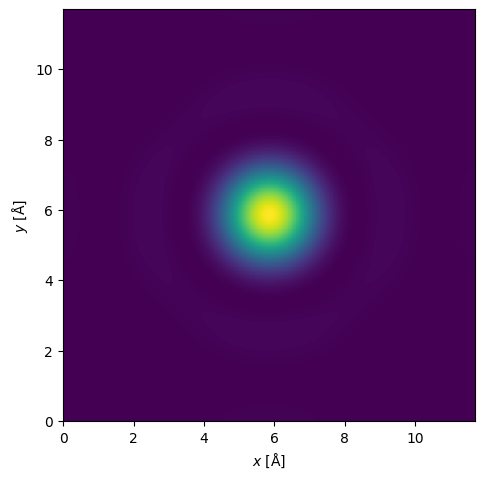

In [16]:
convergence_angle = 7  # 단위 mrad
acceleration_voltage = 150e3  # 단위 V
defocus = 0  

probe = abtem.Probe(energy=acceleration_voltage, semiangle_cutoff=convergence_angle, 
                     defocus=defocus, Cs=3e5)
probe.grid.match(potential)

probe.show()

[                                        ] | 0% Completed | 7.33 ms

[########################################] | 100% Completed | 1.55 sms


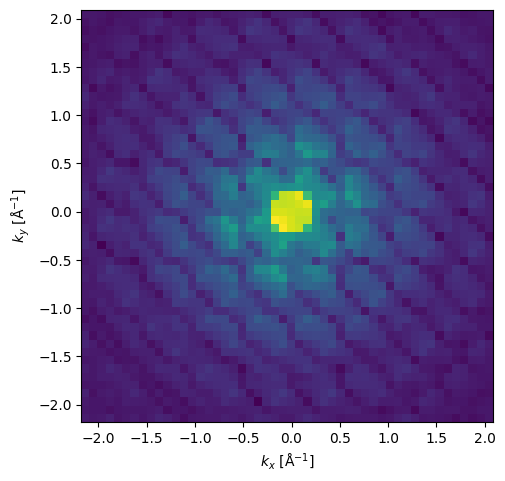

In [17]:
detector = abtem.PixelatedDetector(max_angle='full')
detector = abtem.PixelatedDetector(max_angle=60)
cbed = probe.build().multislice(potential, detectors=[detector])
cbed.show(power=0.25)